# Method 1: Logistic Regression 

In [7]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [8]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [9]:
df=pd.read_csv("./diabetes.csv")

In [10]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


__Model Building and Estimation__

In [11]:
df["Outcome"].value_counts()

0    63
1    36
Name: Outcome, dtype: int64

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,99.0,4.646465,3.589421,0.000,1.500,4.000,7.0000,15.000
Glucose,99.0,117.898990,33.881695,0.000,99.000,112.000,139.0000,197.000
BloodPressure,99.0,67.848485,22.008979,0.000,64.000,72.000,80.0000,110.000
SkinThickness,99.0,19.585859,16.082701,0.000,0.000,21.000,32.0000,60.000
Insulin,99.0,72.878788,126.226980,0.000,0.000,0.000,110.0000,846.000
BMI,99.0,30.807071,9.472185,0.000,25.200,31.600,37.1000,48.800
DiabetesPedigreeFunction,99.0,0.470384,0.372773,0.102,0.248,0.344,0.5845,2.288
Age,99.0,34.454545,11.264241,21.000,25.500,31.000,42.0000,60.000
Outcome,99.0,0.363636,0.483494,0.000,0.000,0.000,1.0000,1.000


In [13]:
y = df["Outcome"]
x= df.drop(["Outcome"], axis = 1)

In [14]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [15]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


__Model Building__

In [16]:
log_model = LogisticRegression(solver = "liblinear").fit(x,y)

In [17]:
log_model.intercept_

array([-2.41135475])

In [18]:
log_model.coef_

array([[ 0.06138993,  0.01058582, -0.02161403, -0.00259078,  0.00192952,
         0.02330933,  0.23060218,  0.02680939]])

In [19]:
log_model.predict(x)[0:10]

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [20]:
y[0:10]

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [21]:
y_pred = log_model.predict(x)

In [22]:
confusion_matrix(y, y_pred)

array([[56,  7],
       [16, 20]], dtype=int64)

__Accuracy__

In [23]:
accuracy_score(y, y_pred)

0.7676767676767676

In [24]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83        63
           1       0.74      0.56      0.63        36

    accuracy                           0.77        99
   macro avg       0.76      0.72      0.73        99
weighted avg       0.76      0.77      0.76        99



In [25]:
log_model.predict_proba(x)[0:10]

array([[0.46380105, 0.53619895],
       [0.80530203, 0.19469797],
       [0.45273037, 0.54726963],
       [0.81093026, 0.18906974],
       [0.30474934, 0.69525066],
       [0.73663203, 0.26336797],
       [0.71473172, 0.28526828],
       [0.2590127 , 0.7409873 ],
       [0.20048602, 0.79951398],
       [0.76328013, 0.23671987]])

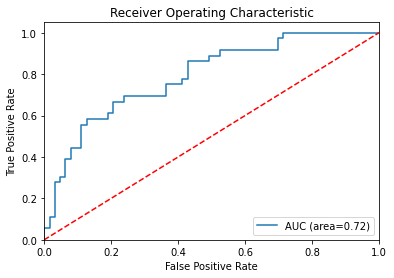

In [26]:
logit_roc_auc=roc_auc_score(y, log_model.predict(x))
fpr, tpr, thresholds= roc_curve(y, log_model.predict_proba(x)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area=%0.2f)' % logit_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [28]:
log_model = LogisticRegression(solver = "liblinear").fit(x_train,y_train)

In [29]:
y_pred = log_model.predict(x_test)

In [30]:
print(accuracy_score(y_test, y_pred))

0.7333333333333333


In [31]:
cross_val_score(log_model, x_test, y_test, cv = 10).mean()

c:\users\temp.desktop-n0lfoj4\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\model_selection\_split.py:665: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


0.5333333333333333

# Method 2: K-Nearest Neighbors Algorithm

In [32]:
y = df["Outcome"]
x= df.drop(["Outcome"], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [33]:
knn_model=KNeighborsClassifier().fit(x_train,y_train)

In [34]:
knn_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [35]:
y_pred= knn_model.predict(x_test)

In [36]:
accuracy_score(y_test,y_pred)

0.5666666666666667

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.94      0.71        17
           1       0.50      0.08      0.13        13

    accuracy                           0.57        30
   macro avg       0.54      0.51      0.42        30
weighted avg       0.54      0.57      0.46        30



In [38]:
knn= KNeighborsClassifier()

In [39]:
np.arange(1,50)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [40]:
knn_params = {"n_neighbors": np.arange(1,50)}

In [41]:
knn_cv_model = GridSearchCV(knn, knn_params, cv =10).fit(x_train, y_train)

In [42]:
knn_cv_model.best_score_

0.680952380952381

In [43]:
knn_cv_model.best_params_

{'n_neighbors': 7}

In [44]:
knn_tuned = KNeighborsClassifier(n_neighbors = 11).fit(x_train, y_train)

In [45]:
y_pred = knn_tuned.predict(x_test)

In [46]:
accuracy_score(y_test, y_pred)

0.5333333333333333

In [47]:
knn_tuned.score(x_test, y_test)

0.5333333333333333

# Method 3: Support Vector Machines (SVM)

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state = 42)

In [49]:
svm_model = SVC(kernel = "linear").fit(x_train, y_train)

In [50]:
svm_model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [51]:
y_pred = svm_model.predict(x_test)

In [52]:
accuracy_score(y_test, y_pred)

0.6333333333333333

In [53]:
svm = SVC()

In [54]:
svm_params = {"C":np.arange(1,10), "kernel": ["linear","rbf"]}

In [55]:
svm_cv_model = GridSearchCV(svm, svm_params, cv=5, n_jobs = -1, verbose = 2).fit(x_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   12.0s finished


In [51]:
svm_cv_model.best_score_

0.7821229050279329

In [52]:
svm_cv_model.best_params_

{'C': 2, 'kernel': 'linear'}

In [57]:
svm_tuned = SVC(C = 2, kernel = "linear").fit(x_train, y_train)

In [58]:
y_pred = svm_tuned.predict(x_test)

In [59]:
accuracy_score(y_test, y_pred)

0.7445887445887446